## Overview

### Data understanding

* Read parquet file
* make a exploratory data analysis

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
path = Path("../data/processed/avc.parquet")

df = pd.read_parquet(path)
df

,DATA,co_ppb,pm25_ugm3,so2_ugm3,NO2_NOVO,OZ_MICRO,TMAX,T03,T05,TMIN,...,L2AVC,L3AVC,L4AVC,L5AVC,L6AVC,L7AVC,DIFERTEMP,VAR00001,TAPMIN,TAPMAX
0,2016-01-01,184.9,16.0,0.3,9.417000,25.999110,31.6,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,0,0.0,NaN,3121,NaN,31.21
1,2016-01-02,178.1,17.9,0.3,9.417000,25.384958,33.9,NaN,NaN,24.2,...,1.0,1.0,2.0,0.0,0,0.0,9.7,3585,16.07,35.85
2,2016-01-03,186.9,17.6,0.2,9.417000,29.684023,28.1,31.200000,NaN,24.6,...,1.0,2.0,0.0,0.0,0,2.0,3.5,2096,14.14,20.96
3,2016-01-04,180.7,15.1,0.2,0.000000,36.644415,34.8,32.266667,NaN,23.9,...,2.0,0.0,0.0,0.0,2,0.0,10.9,3896,15.86,38.96
4,2016-01-05,172.5,15.6,0.2,9.417000,28.660436,31.1,31.333333,31.90,24.0,...,0.0,0.0,0.0,2.0,0,0.0,7.1,2885,14.41,28.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2018-12-27,137.3,8.4,0.5,56.502003,28.046284,33.5,33.666667,33.86,24.8,...,1.0,0.0,0.0,NaN,0,NaN,8.7,3373,16.98,33.73
1092,2018-12-28,132.5,11.4,0.4,37.668002,20.471740,31.7,33.233333,33.20,23.2,...,0.0,0.0,NaN,NaN,0,NaN,8.5,3052,13.95,30.52
1093,2018-12-29,129.0,10.4,0.3,28.251001,23.542501,31.2,32.133333,32.78,24.8,...,0.0,NaN,NaN,NaN,0,NaN,6.4,2860,15.80,28.60
1094,2018-12-30,112.0,12.9,0.4,28.251001,27.636849,30.5,31.133333,32.28,23.8,...,NaN,NaN,NaN,NaN,0,NaN,6.7,2547,16.81,25.47


In [3]:
df.dtypes

DATA         datetime64[ns]
co_ppb              float64
pm25_ugm3           float64
so2_ugm3            float64
NO2_NOVO            float64
OZ_MICRO            float64
TMAX                float64
T03                 float64
T05                 float64
TMIN                float64
UR                  float64
PRESS               float64
DS                    int64
LD                    int64
LAG0                  int64
LAG1                float64
LAG2                float64
LAG3                float64
LAG4                float64
LAG5                float64
LAG6                float64
LAG7                float64
L0AVC                 int64
L1AVC               float64
L2AVC               float64
L3AVC               float64
L4AVC               float64
L5AVC               float64
L6AVC                 int64
L7AVC               float64
DIFERTEMP           float64
VAR00001              int64
TAPMIN              float64
TAPMAX              float64
dtype: object

In [26]:

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Pressure", "co_ppb", "pm25_ugm3", "so2_ugm3", "LAG0"))

fig.add_trace(
    go.Scatter(x=df.DATA, y=df.PRESS),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df.DATA, y=df.co_ppb),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=df.DATA, y=df.pm25_ugm3),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df.DATA, y=df.so2_ugm3),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=df.DATA, y=df.LAG0),
    row=3, col=1
)

fig.update_layout(height=700, width=800, title_text="Pressure and internations line charts")
fig.show()

In [27]:
df_ts = df
df_ts.L0AVC

0       0
1       0
2       1
3       1
4       1
       ..
1091    2
1092    0
1093    1
1094    0
1095    0
Name: L0AVC, Length: 1096, dtype: int64

In [28]:
df_ts[["DATA", "LAG0"]].set_index("DATA").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LAG0    1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
series = df_ts[["DATA", "L0AVC"]].set_index("DATA")

series = series.asfreq("d")

result = seasonal_decompose(series, model='additive')

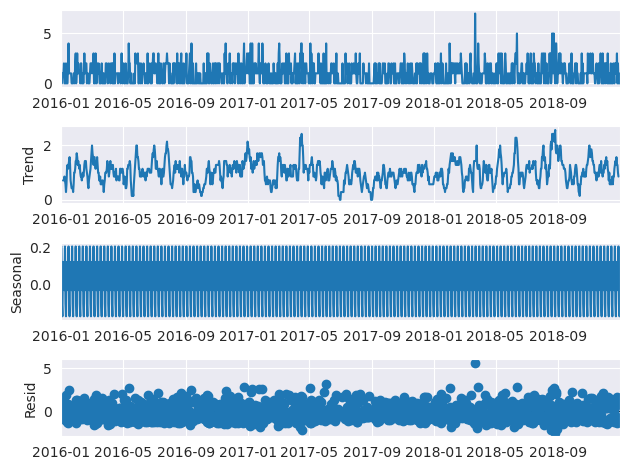

In [37]:
result.plot();